<a href="https://colab.research.google.com/github/Mateo289/Teoria_senales/blob/main/Tarea/15/nov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
!pip install spectrum

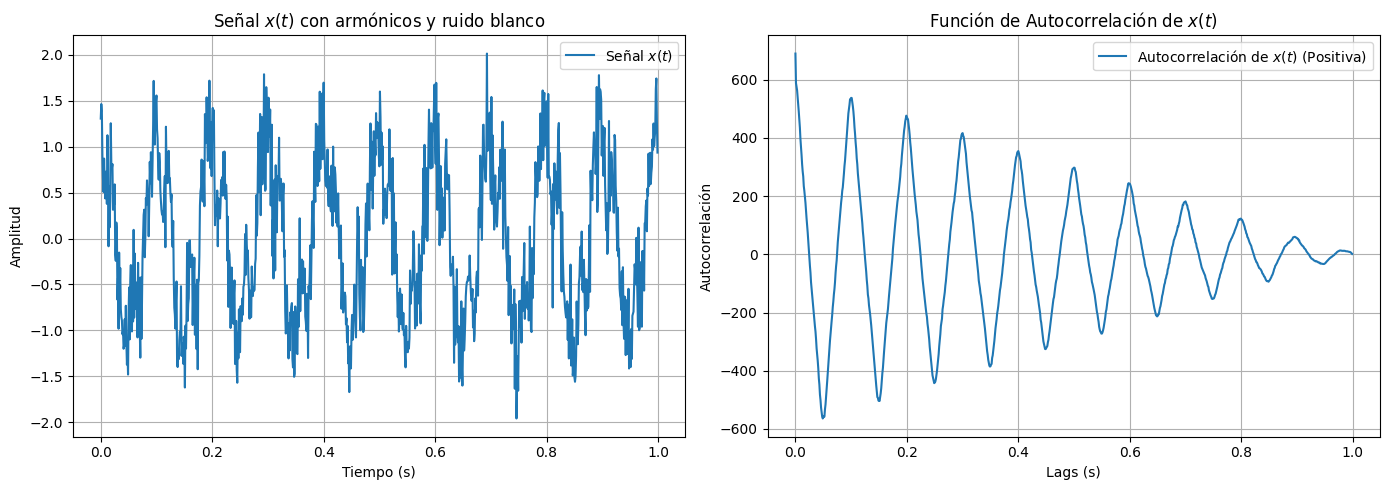

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
from scipy.signal import welch
from spectrum import pmtm
# Parámetros
fs = 1000  # Frecuencia de muestreo en Hz
T = 1      # Duración de la señal en segundos
t = np.linspace(0, T, int(fs * T), endpoint=False)

# Frecuencias angulares y pesos de los armónicos
Wo = 2 * np.pi * 10  # Frecuencia fundamental en radianes por segundo
frecuencias = [Wo, 3 * Wo, 5 * Wo]
pesos = [1, -1/3, 1/5]

# Generar la señal x(t) como la suma de armónicos
signal = np.zeros_like(t)
for i in range(len(frecuencias)):
    if i % 2 == 0:
        signal += pesos[i] * np.cos(frecuencias[i] * t)
    else:
        signal += pesos[i] * np.sin(frecuencias[i] * t)

# Añadir ruido blanco gaussiano con media 0 y varianza 0.1
media_ruido = 0
varianza_ruido = 0.1
ruido = np.random.normal(media_ruido, np.sqrt(varianza_ruido), len(t))
x_t = signal + ruido

# Calcular la función de autocorrelación de x(t)
autocorr = correlate(x_t, x_t, mode='full')
lags = np.arange(-len(t) + 1, len(t))

# Solo tomar la parte positiva de la autocorrelación (desde el número cero en adelante)
autocorr_pos = autocorr[len(t)-1:]
lags_pos = lags[len(t)-1:]

# Crear una figura con dos subgráficas en la misma fila
plt.figure(figsize=(14, 5))

# Gráfica de la señal x(t)
plt.subplot(1, 2, 1)
plt.plot(t, x_t, label="Señal $x(t)$")
plt.title("Señal $x(t)$ con armónicos y ruido blanco")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()

# Gráfica de la función de autocorrelación solo para lags positivos
plt.subplot(1, 2, 2)
plt.plot(lags_pos / fs, autocorr_pos, label="Autocorrelación de $x(t)$ (Positiva)")
plt.title("Función de Autocorrelación de $x(t)$")
plt.xlabel("Lags (s)")
plt.ylabel("Autocorrelación")
plt.legend()
plt.grid()

plt.tight_layout()  # Ajusta el espacio entre las subgráficas
plt.show()


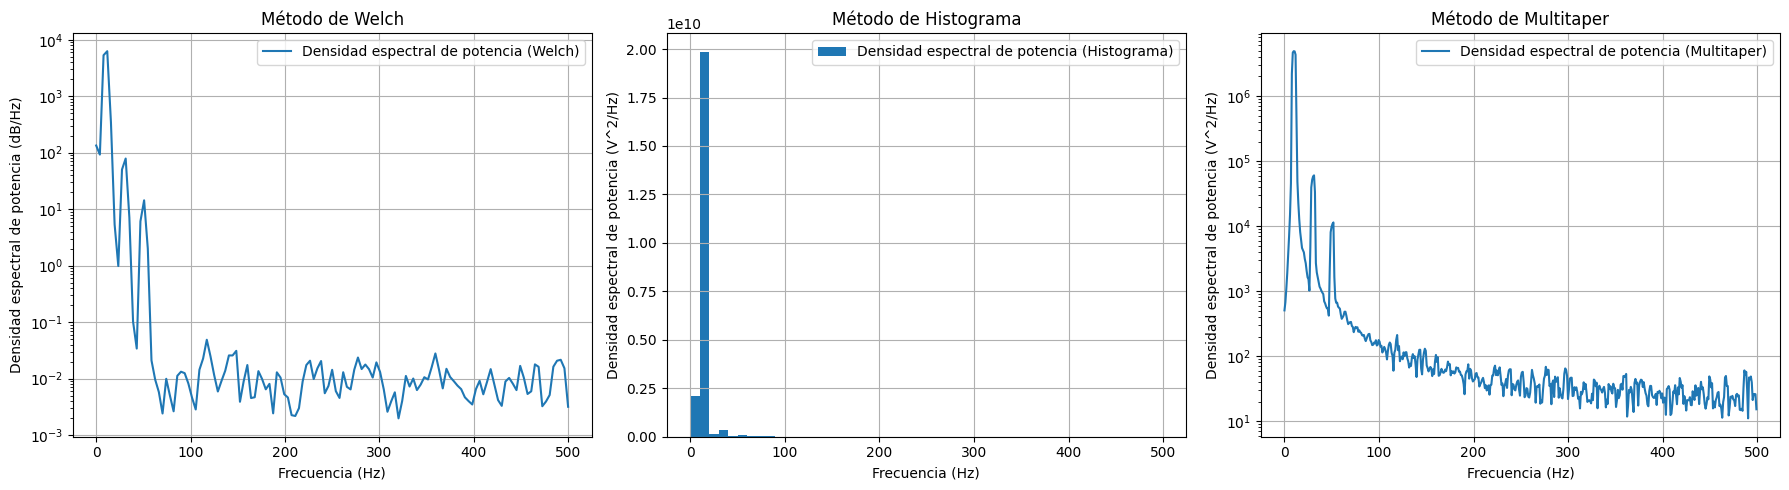

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import welch
from scipy.fftpack import fft
from spectrum import pmtm  # Asegúrate de instalar la biblioteca `spectrum` para el método multitaper

# Parámetros
fs = 1000  # Frecuencia de muestreo en Hz

# Aplicar el método de Welch a la autocorrelación positiva
f_welch, Pxx_welch = welch(autocorr_pos, fs, nperseg=256)

# Método de Histograma
n_bins = 50  # Número de bins para el histograma
frecuencia_espectro = np.fft.fftfreq(len(autocorr_pos), d=1/fs)
potencia_espectro = np.abs(np.fft.fft(autocorr_pos))**2

# Método Multitaper
tapers, eigenvalues, *_ = pmtm(autocorr_pos, NW=2.5, k=4, show=False)
psd_multitaper = np.mean([np.abs(taper)**2 for taper in tapers], axis=0)
frecuencias_multitaper = np.fft.fftfreq(len(psd_multitaper), d=1/fs)

# Crear una figura con tres subgráficas en la misma fila
plt.figure(figsize=(18, 5))

# Gráfico para el método de Welch
plt.subplot(1, 3, 1)
plt.semilogy(f_welch, Pxx_welch, label="Densidad espectral de potencia (Welch)")
plt.title("Método de Welch")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad espectral de potencia (dB/Hz)")
plt.legend()
plt.grid()

# Gráfico para el método de Histograma
plt.subplot(1, 3, 2)
plt.hist(frecuencia_espectro[:len(frecuencia_espectro)//2], bins=n_bins, weights=potencia_espectro[:len(potencia_espectro)//2], label="Densidad espectral de potencia (Histograma)")
plt.title("Método de Histograma")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad espectral de potencia (V^2/Hz)")
plt.legend()
plt.grid()

# Gráfico para el método Multitaper
plt.subplot(1, 3, 3)
plt.semilogy(frecuencias_multitaper[:len(frecuencias_multitaper)//2], psd_multitaper[:len(psd_multitaper)//2], label="Densidad espectral de potencia (Multitaper)")
plt.title("Método de Multitaper")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad espectral de potencia (V^2/Hz)")
plt.legend()
plt.grid()

plt.tight_layout()  # Ajusta el espacio entre las subgráficas
plt.show()

